In [2]:
import scanpy as sc
import scvelo as scv

In [3]:
# 1. Set the drawing style (to make the drawing look better)
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
# scv.set_figure_params('scvelo', dpi=300, fontsize=10) # High-resolution images for the paper

In [4]:
# 2. Download and load pancreas sample data
# This will automatically download 'endocrinogenesis_day15.h5ad' from the internet to your data/ folder.
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

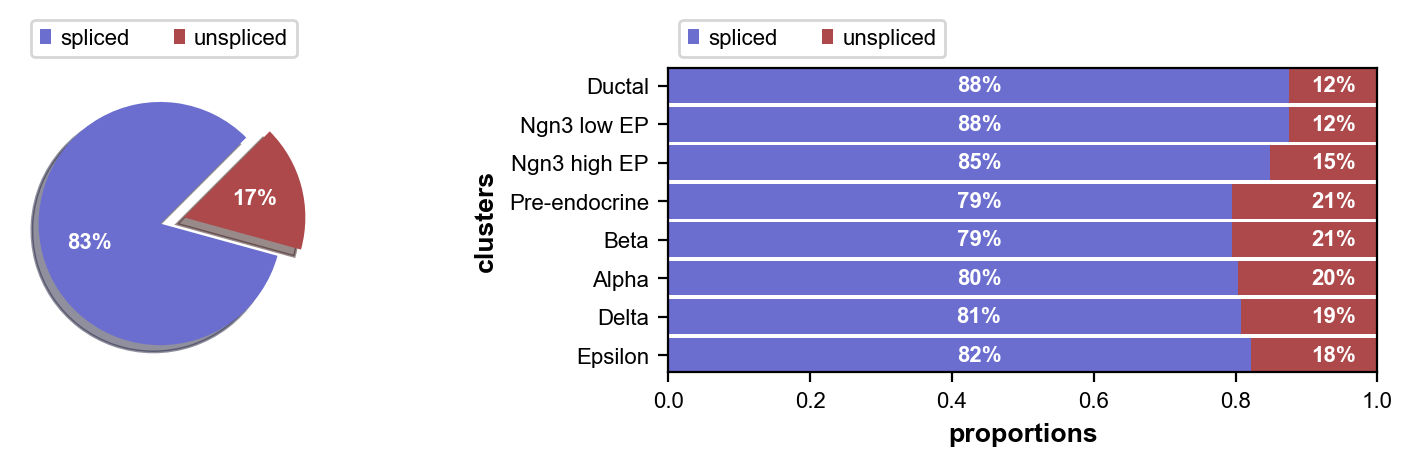

In [5]:
# 3. View the proportions of spliced/unspliced counts
scv.pl.proportions(adata)

In [6]:
# 4. Preprocess the Data
# (1) Filtering and normalization: gene selection, normalizing, logarithmizing X
# (2) Calculate the first and second order moments (means and uncentered variances) computed among nearest neighbors in PCA space

scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

# Check the remaining number of genes
print(adata.n_vars)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96802/4047783222.py:6: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2000


In [7]:
# 5. Inferring complete transcriptional dynamics parameters based on the dynamical modeling
scv.tl.recover_dynamics(adata, n_jobs=-1)

recovering dynamics (using 10/10 cores)


  0%|          | 0/1298 [00:00<?, ?gene/s]

    finished (0:00:49) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [8]:
# 6.1 Caluclate the velocity based on dynamics parameters.
scv.tl.velocity(adata, mode='dynamical')

# 6.2 Caluclate cell transition probability
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [9]:
# 6.3 Running the dynamical model can take a while. Store the results for re-use
adata.write('data/pancreas.h5ad', compression='gzip')
# adata = scv.read('data/pancreas.h5ad')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

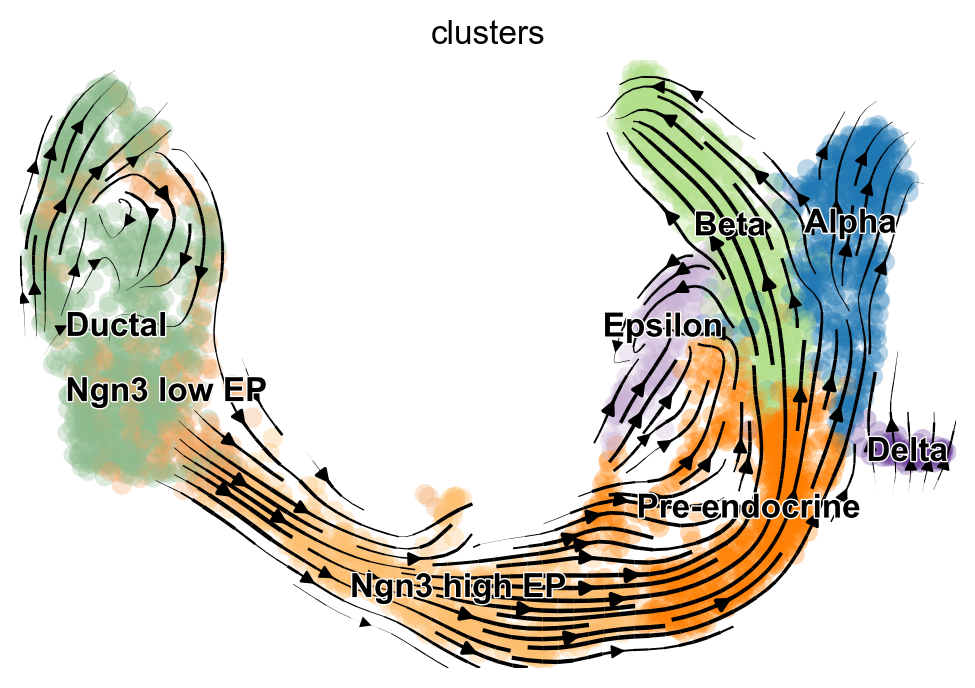

In [10]:
# 6。4  Visualize the velocity between clusters on Umap.
scv.pl.velocity_embedding_stream(adata, basis='umap')

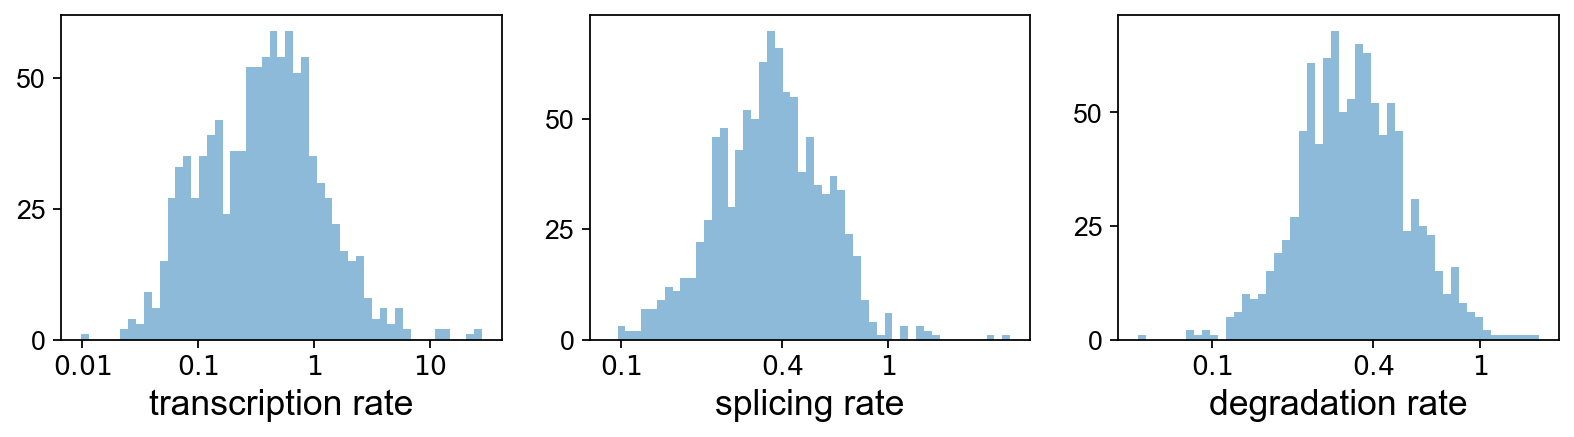

/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96802/4267944300.py:15: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  scv.get_df(adata, 'fit*', dropna=True).head()


,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
index,,,,,,,,,,,,,,,,
Sntg1,0.401981,0.015691,0.005580,0.088596,23.361287,42.849447,1.029644,0.030838,0.404214,0.0,0.0,0.159472,2.470675,0.094304,0.148184,5.367455
Snhg6,0.125071,0.398162,2.905930,0.241602,6.341116,0.070368,0.037113,0.245248,0.253217,0.0,0.0,0.403409,0.106128,0.596630,0.828193,2.090614
Sbspon,0.624803,0.186640,0.978484,0.145166,8.786484,0.154771,0.058587,0.178859,0.253170,0.0,0.0,0.182087,0.164805,0.430623,0.796741,2.971447
Mcm3,0.292389,1.949030,25.175632,0.401935,3.255922,0.013943,0.016253,0.673142,0.228208,0.0,0.0,0.467683,0.051432,1.927742,0.687468,1.410116
Fam135a,0.384662,0.165358,0.113024,0.195766,11.113342,1.124040,0.356525,0.149868,0.279681,0.0,0.0,0.387922,1.345830,0.393197,0.691025,3.542106


In [11]:
# 6.5 Visualize the Kinetic rate paramters

df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)

# Histograms show dynamic parameters
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

# The table displays the dynamic parameters.
scv.get_df(adata, 'fit*', dropna=True).head()

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

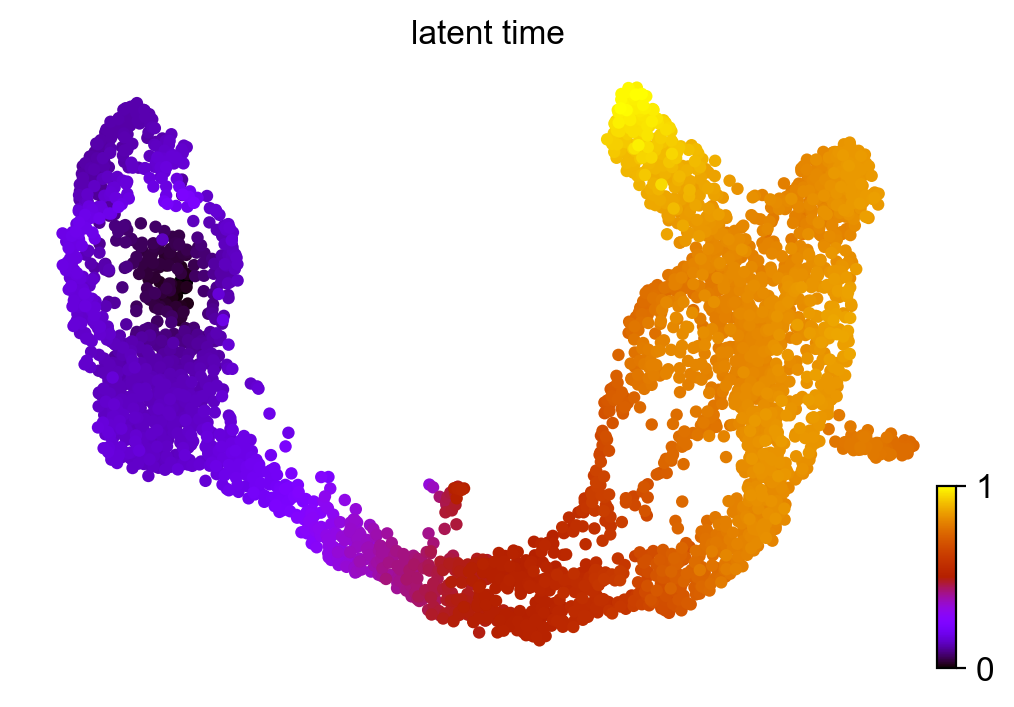

In [13]:
# 7.1 Computing latent time
scv.tl.latent_time(adata)

# 7.2 Visualize latent time on Umap
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


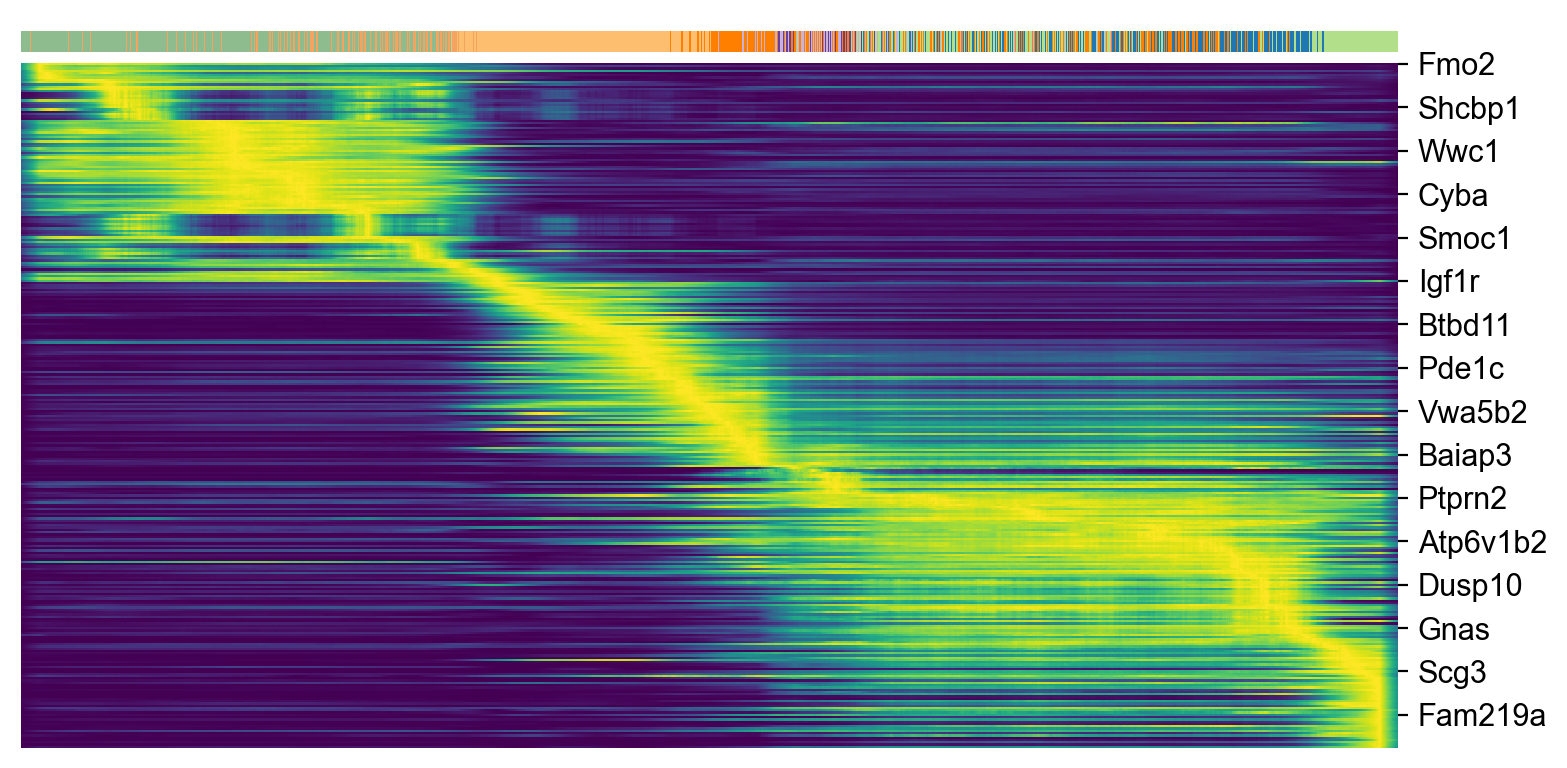

In [14]:
# 7.3 Heatmap shows how genes are expressed throughout development.
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

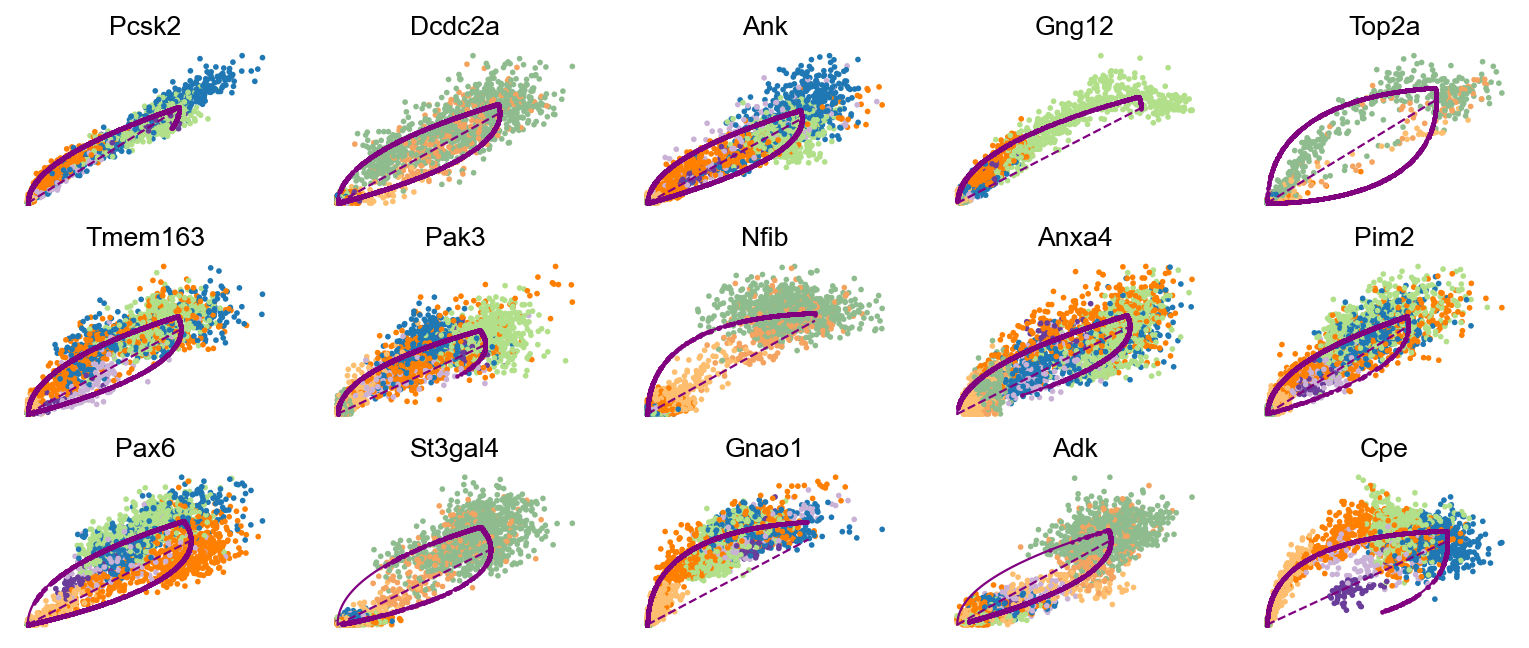

In [15]:
# 7.4 Top-likelihood genes
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

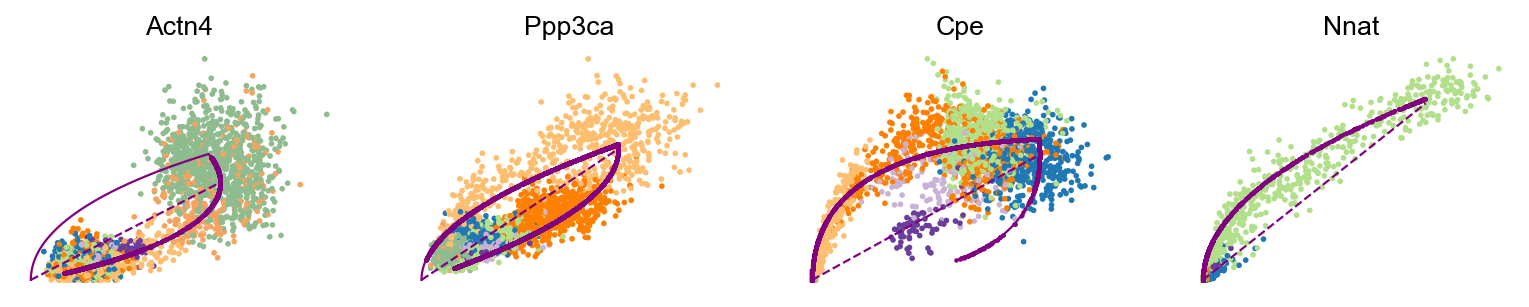

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

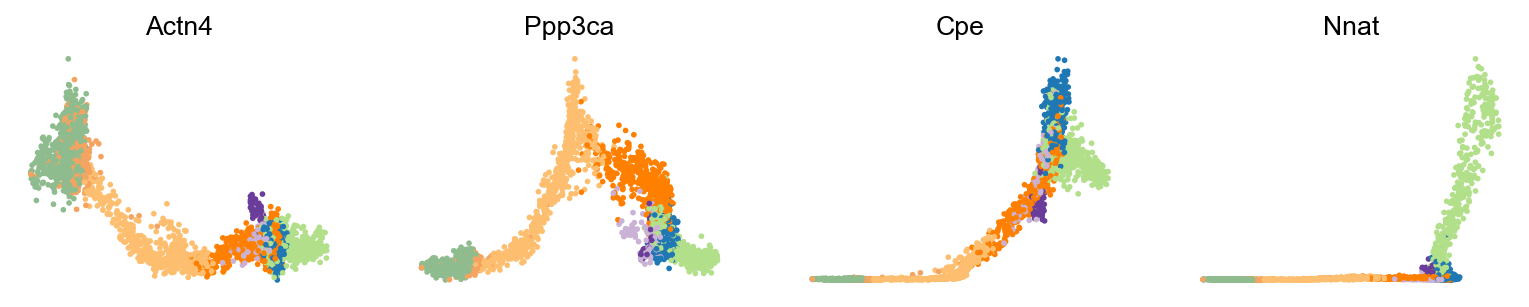

In [16]:
# 7.5 How particular genes are expressed throughout development.
var_names = ['Actn4', 'Ppp3ca', 'Cpe', 'Nnat']
scv.pl.scatter(adata, var_names, frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, frameon=False)

In [18]:
# 8.1 Cluster-specific top-likelihood genes
scv.tl.rank_dynamical_genes(adata, groupby='clusters')

# 8.2 Visualize in table
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:01) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96802/120168476.py:5: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  df = scv.get_df(adata, 'rank_dynamical_genes/names')
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/core/_anndata.py:257: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(data.obs[key])


,Ductal,Ngn3 low EP,Ngn3 high EP,Pre-endocrine,Beta,Alpha,Delta,Epsilon
0,Dcdc2a,Dcdc2a,Rbfox3,Abcc8,Pcsk2,Cpe,Pcsk2,Tox3
1,Top2a,Adk,Mapre3,Tmem163,Ank,Gnao1,Rap1b,Rnf130
2,Nfib,Mki67,Btbd17,Gnao1,Tmem163,Pak3,Pak3,Adk
3,Wfdc15b,Wfdc15b,Tcp11,Pax6,Tspan7,Pim2,Meis2,Ncam1
4,St3gal4,Tpx2,Sulf2,Ank,Pax6,Gnas,Abcc8,Pax6


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

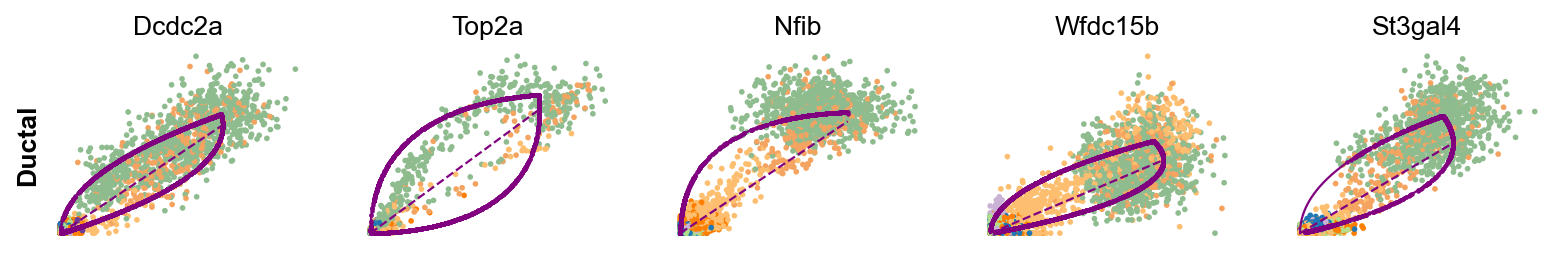

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

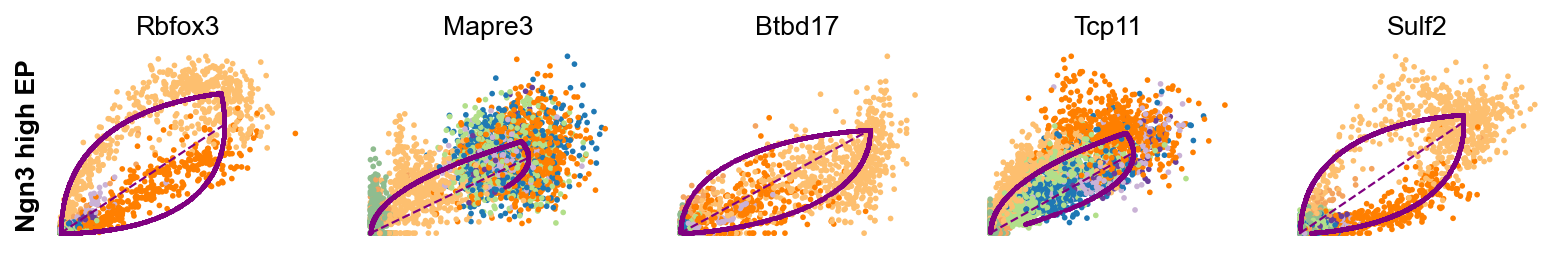

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

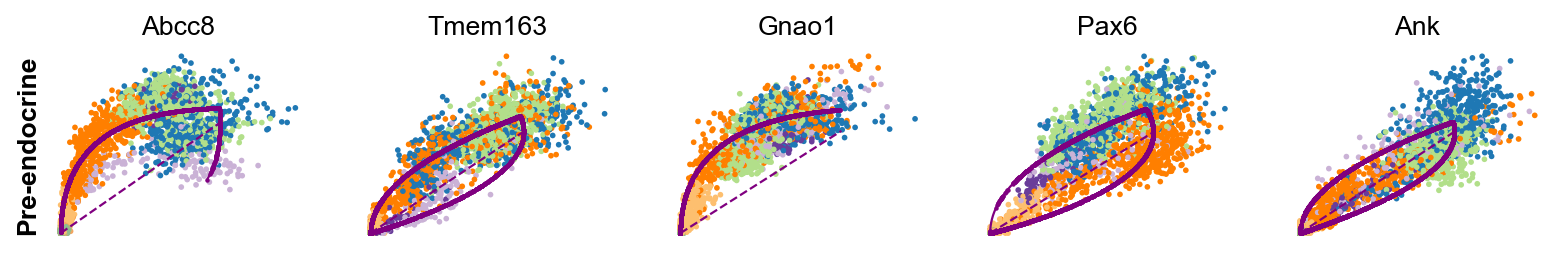

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

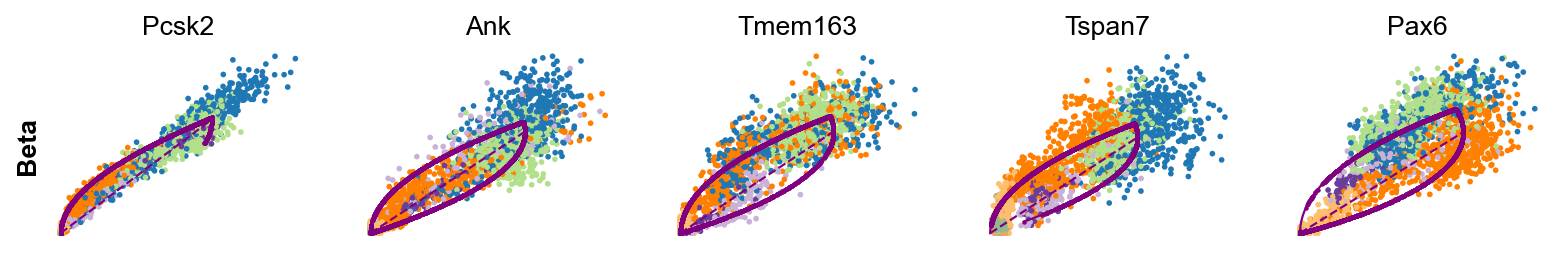

In [19]:
# 8.3 Visualize in phase portrait
for cluster in ['Ductal', 'Ngn3 high EP', 'Pre-endocrine', 'Beta']:
    scv.pl.scatter(adata, df[cluster][:5], ylabel=cluster, frameon=False)